In [1]:
# importing libraries to be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# reading dataset
df=pd.read_csv('electronics.csv')

In [3]:
# viewing few random rows
df.sample(5)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
710888,3836,644998,1.0,2015-12-26,Male,Accessories & Supplies,NaN,2014,Female,0
303430,1451,283437,2.0,2014-08-02,Male,Headphones,NaN,2010,NaN,0
124840,2400,118477,5.0,2013-01-28,Female&Male,Headphones,JLAB,2012,NaN,0
853527,6717,770422,5.0,2016-05-23,Male,Accessories & Supplies,NaN,2015,NaN,0
1163982,3382,1043485,5.0,2017-09-05,Female,Portable Audio & Video,NaN,2013,Female,0


## EDA
##### Exploratory data analysis

In [4]:
df.shape
print(f"we have {df.shape[0]} rows and {df.shape[-1]} columns")

we have 1292954 rows and 10 columns


In [5]:
# corresponding data types
df.dtypes
# df.info()

item_id         int64
user_id         int64
rating        float64
timestamp      object
model_attr     object
category       object
brand          object
year            int64
user_attr      object
split           int64
dtype: object

In [6]:
# checking for null values
df.isna().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

In [7]:
df.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

In [8]:
df.dropna(subset='brand',inplace=True)

In [9]:
# dropping unnesscary columns
df.drop(['split','year','user_attr'],axis=1,inplace=True)

In [10]:
df.columns

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand'],
      dtype='object')

In [11]:
df.nunique()

item_id         2207
user_id       316699
rating             5
timestamp       6108
model_attr         3
category          10
brand             50
dtype: int64

In [12]:
# df['model_attr'].unique()

In [13]:
df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand
14,1,14,4.0,1999-10-17,Female,Computers & Accessories,HP
42,1,42,5.0,1999-12-13,Female,Computers & Accessories,HP
75,1,75,5.0,2000-03-22,Female,Computers & Accessories,HP
76,1,76,5.0,2000-03-23,Female,Computers & Accessories,HP
77,1,77,2.0,2000-03-25,Female,Computers & Accessories,HP


In [14]:
df['brand'].value_counts()[:5]

Bose        29222
Logitech    29203
Sony        20360
Mpow        17477
EldHus      16530
Name: brand, dtype: int64

In [15]:
# data type conversion
df.dtypes

item_id         int64
user_id         int64
rating        float64
timestamp      object
model_attr     object
category       object
brand          object
dtype: object

In [16]:
# from datetime import datetime

In [17]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [18]:
df['brand']=df['brand'].astype('str')

In [19]:
df.dtypes

item_id                int64
user_id                int64
rating               float64
timestamp     datetime64[ns]
model_attr            object
category              object
brand                 object
dtype: object

In [20]:
df.describe()

,item_id,user_id,rating
count,331120.000000,3.311200e+05,331120.000000
mean,3407.677446,5.094713e+05,4.052428
std,2513.781590,3.520852e+05,1.367006
min,1.000000,1.400000e+01,1.000000
25%,1423.000000,1.908870e+05,4.000000
50%,2728.000000,4.736845e+05,5.000000
75%,5178.000000,8.183392e+05,5.000000
max,9556.000000,1.157632e+06,5.000000


# Data Visualizaton

In [21]:
# the distribution of ratings
df['rating'].value_counts()

5.0    191386
4.0     57318
1.0     35521
3.0     26327
2.0     20568
Name: rating, dtype: int64

In [22]:
print(f"the electronics with five star ratings has the highest rating with {df['rating'].value_counts()[5]} and two star is the lowest with {df['rating'].value_counts()[2]}")

the electronics with five star ratings has the highest rating with 191386 and two star is the lowest with 20568


<Axes: >

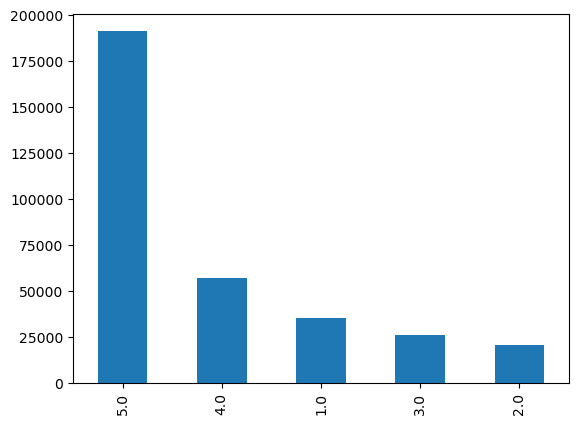

In [23]:
df['rating'].value_counts().plot(kind='bar')

<Axes: xlabel='rating', ylabel='count'>

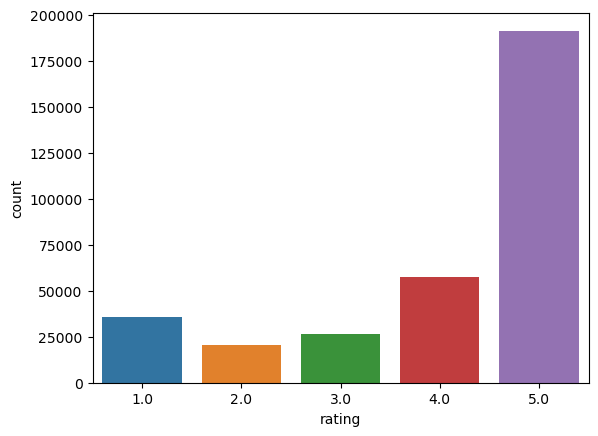

In [24]:
sns.countplot(data=df,x='rating')

#### what was the best year of sales

In [25]:

df['year']=df['timestamp'].dt.year
df.sample()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year
424385,4398,391499,1.0,2015-01-31,Male,Computers & Accessories,IRULU,2015


<Axes: >

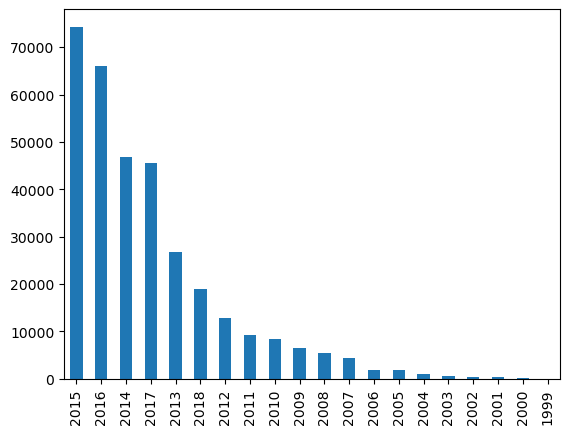

In [30]:
# first extract the year from the timestamp
df['year'].value_counts().plot(kind='bar')

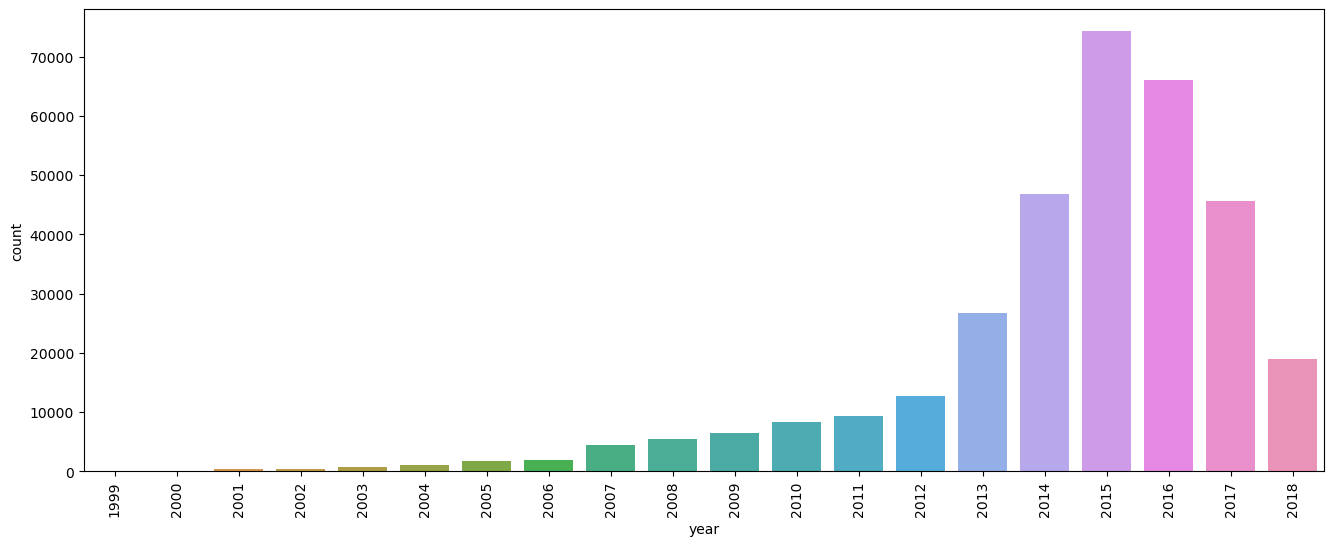

In [31]:
plt.figure(figsize=(16,6))
sns.countplot(data=df,x='year')
plt.xticks(rotation='vertical')
plt.show()

#### what was the best month of sales

In [28]:
# EXTRACTING MONTH FROM THE TIMESTAMP

df['month']=df['timestamp'].dt.month
df.sample()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,month
1017409,5430,730699,5.0,2016-12-29,Female&Male,Portable Audio & Video,Pyle,2016,12


<Axes: >

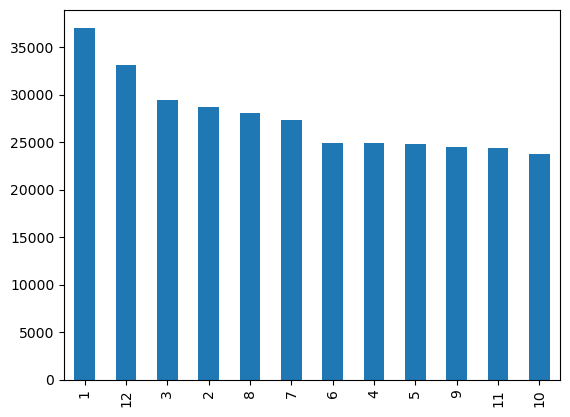

In [29]:
df['month'].value_counts().plot(kind='bar')

##### What products by category were sold the most in January

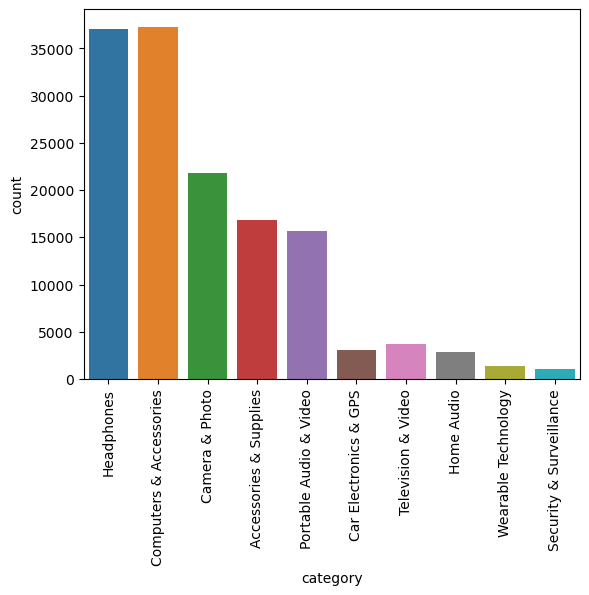

In [29]:

sns.countplot(data=df[df['month']==1],x='category',order=df['category'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [30]:
df

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,nan,1999,6
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,nan,1999,6
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,nan,1999,6
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,nan,1999,7
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,nan,1999,7
...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2018,9
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,nan,2018,9
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,nan,2018,9
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,nan,2018,9


In [31]:
df['brand'].dropna(inplace=True)

In [32]:
df.dropna(subset='brand',inplace=True)

In [33]:
df

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,nan,1999,6
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,nan,1999,6
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,nan,1999,6
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,nan,1999,7
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,nan,1999,7
...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2018,9
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,nan,2018,9
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,nan,2018,9
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,nan,2018,9


<Axes: xlabel='brand'>

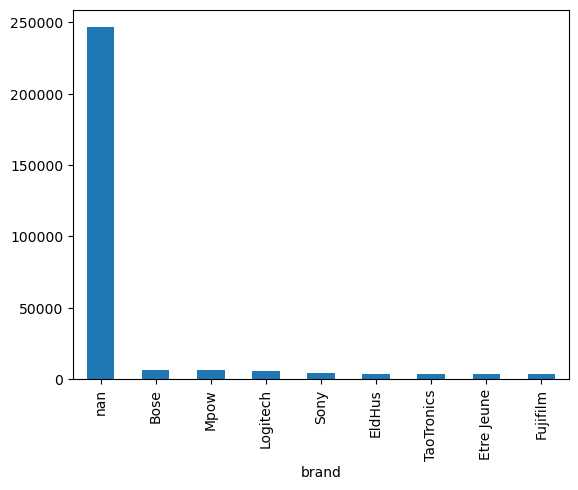

In [34]:
# what brand sold the most in 2015
year_2015=df[df['year']==2015]
year_2015.groupby(df['brand'])['rating'].count().sort_values(ascending=False)[:9].plot(kind='bar')

In [35]:
df

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,nan,1999,6
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,nan,1999,6
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,nan,1999,6
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,nan,1999,7
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,nan,1999,7
...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2018,9
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,nan,2018,9
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,nan,2018,9
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,nan,2018,9


<Axes: xlabel='brand'>

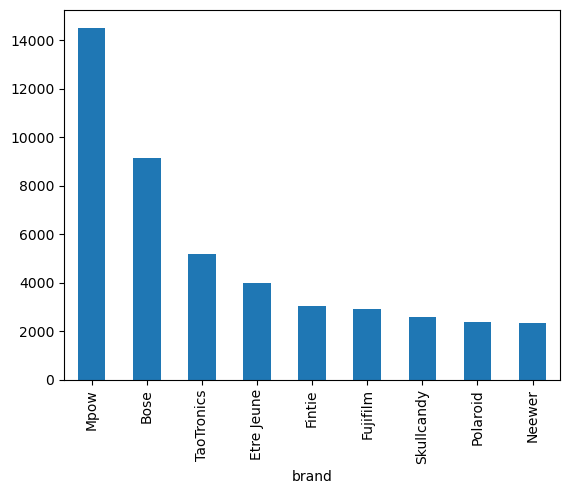

In [9]:
# what product sold the most in 2016
# what product sold the most in 2017
# what product sold the most in 2018

# How much was made in sales in the year 2015
df[df['year']==2015].groupby('brand')['rating'].count().sort_values(ascending=False)[:9].plot(kind='bar')

In [ ]:
df['year'].value_counts()

In [ ]:
df['category'].value_counts()